# 1. 데이터: Malwares Classification 데이터 셋
- Malware를 분류하는 것을 목적으로 하는 데이터 셋
- 총 68개의 독립 변수를 통해 종속 변수(Not Malware=0, Malware=1)를 예측해야 함

In [15]:
import numpy as np
import pandas as pd
data = pd.read_csv('./data/Malwares Classification.csv')

In [16]:
data.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,class
0,144.0,3.0,4.0,65535.0,184.0,256.0,4.0,1.0,0.0,1.0,...,1.0,1.0,3.0,0.0,6.603616,5.443362,1181520.0,6.627552,1.0,0.0
1,144.0,3.0,4.0,65535.0,184.0,184.0,4.0,1.0,0.0,1.0,...,1.0,1.0,3.0,0.0,5.205926,2.123522,7680.0,5.318221,0.0,0.0
2,144.0,3.0,4.0,65535.0,184.0,272.0,5.0,1.0,0.0,1.0,...,1.0,1.0,4.0,0.0,6.238000,3.380859,57872.0,6.507758,1.0,0.0
3,144.0,3.0,4.0,65535.0,184.0,184.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.000000,0.000000,95616.0,4.575092,1.0,0.0
4,144.0,3.0,4.0,65535.0,184.0,224.0,5.0,1.0,0.0,1.0,...,1.0,1.0,4.0,0.0,6.355626,0.702621,48128.0,5.545531,1.0,0.0


In [17]:
print(data.columns)

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

In [18]:
# Label 분리 및 불필요한 변수 제거
data = data.dropna(axis=0)
labels = data.loc[:,'class']
X_data = data.drop('class',axis=1)

# 2. Data Split
- 무작위 추출 방식을 활용하여 전체 데이터 셋을 Train, Validation, Test로 구분함

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
# train 데이터를 기반으로 train/test 데이터에 대하여 standard scaling 적용 (평균 0, 분산 1) 
scaler = StandardScaler()
scaler = scaler.fit(X_train)

In [22]:
X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns,index=X_train.index)
X_val   = pd.DataFrame(scaler.transform(X_val),columns=X_val.columns,index=X_val.index)
X_test  = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

# 3. 단순 모델 학습 및 평가
- 변수 선택법을 적용하지 않았을 때, 선형 회귀 모델과 로지스틱 회귀 모델을 학습하고 그 성능을 평가함

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [24]:
# 선형 회귀 학습
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)
# 로지스틱 회귀 학습
logistic_fitter = LogisticRegression(solver="lbfgs")
logistic_fitter.fit(X_train, y_train)

LogisticRegression()

In [25]:
#Accuracy 측정
def Acc(pred,label,pri=True):
    if pri:
        print("Accuracy:",np.round(np.sum(pred==label)/len(label)*100,1),"%")
    return np.sum(pred==label)/len(label)

In [26]:
#선형 회귀 모델 예측 결과
line_pred_test = line_fitter.predict(X_test)
#로지스틱 회귀 모델 예측 결과
logistic_pred_test = logistic_fitter.predict(X_test)

In [27]:
#선형 회귀 성능 평가
print("선형 회귀 모델")
linear_all = Acc(line_pred_test>0.5,y_test)
print("로지스틱 회귀 모델")
logistic_all = Acc(logistic_pred_test,y_test)

선형 회귀 모델
Accuracy: 92.5 %
로지스틱 회귀 모델
Accuracy: 95.2 %


# 4-2. 변수 선택법: 유전 알고리즘
- 메타 휴리스틱 방법론이 유전 알고리즘을 응요한 변수 선택 기법
- 전진 선택법, 후진 소거법 그리고 단계적 선택법과 비교해 효율적으로 더 많은 범위의 조합을 탐색할 수 있는 알고리즘
- 총 6단계로 구성됨
    - Step 1:염색체 초기화
    - Step 2:각 염색체 선택 변수별 모델학습
    - Step 3:각 염색체 적합도 평가
    - Step 4:우수 염색체 선택
    - Step 5:다음 세대 염색체 생성
    - Step 6:Stopping Criteria 만족: 최종 변수 집합(=염색체) 선택, Stopping Criteria 불만족: Step 2부터 다시 진행

### Step 1. 염색체 초기화
- 염색체는 세대(Population)를 구성하는 기본 단위
- 변수 선택법에서 염색체는 독립변수의 개수만큼의 유전자를 가지며 유전자의 값(0 or 1)에 따라 변수 조합이 표현됨
    - m번째 유전자의 값=0 -> m번 변수를 사용하지 않음
    - m번째 유전자의 값=1 -> m번 변수를 사용함
- GA를 시작하기 위해서는 한 세대를 구성하는 염색체의 개수를 설정한 후, 각 염색체들을 random하게 초기화 해주어야 함

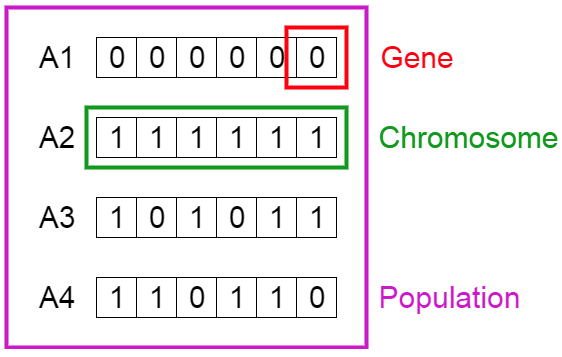

In [30]:
import random

In [31]:
def GA (model, X_train,y_train,X_val,y_val, iteration=50, population=100):
      
    for i in range(iteration):
        ###첫 세대 구성
        if i==0:
            var = np.array(range(len(X_train.columns)))
            var_length = len(var)
            one  = np.ones((population,round(var_length/2)))
            zero = np.zeros((population,var_length-round(var_length/2)))
            old_population = []
            temp = np.hstack([one,zero])
            temp = temp[0]
            for ind in range(population):
                temp2 = temp.copy()
                random.shuffle(temp2)
                old_population.append(temp2)
            
            print(old_population[0])
            print(var[old_population[0]==1.0])

In [32]:
GA(LinearRegression(), X_train,y_train,X_val,y_val,iteration=50,population=100)

[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.]
[ 3  4  9 11 14 15 18 19 20 23 24 25 26 27 28 30 31 33 36 40 41 43 45 46
 47 48 50 54 56 59 60 61 64 66]


### Step 2~3. 각 염색체 선택 변수별 모델 학습 및 평가
- 각 염색체가 표현하는 변수 조합을 통해 모델을 학습함
- 적합도 함수를 활용하여 각 모델을 평가함

In [33]:
def GA (model, X_train,y_train,X_val,y_val, iteration=50, population=100):
      
    for i in range(iteration):
        ###첫 세대 구성
        if i==0:
            var = np.array(range(len(X_train.columns)))
            var_length = len(var)
            one  = np.ones((population,round(var_length/2)))
            zero = np.zeros((population,var_length-round(var_length/2)))
            old_population = []
            temp = np.hstack([one,zero])
            temp = temp[0]
            for ind in range(population):
                temp2 = temp.copy()
                random.shuffle(temp2)
                old_population.append(temp2)
        ###염색체별 모델 구성 및 평가
        score_candidate = []
        for ind in range(population):
            
            temp=old_population[ind]
            temp_var=var[temp==1]
            Temp_X_train = X_train.iloc[:,temp_var]
            Temp_X_val   = X_val.iloc[:,temp_var]
            model.fit(Temp_X_train,y_train)
            prediction = model.predict(Temp_X_val)
            score = Acc(prediction>0.5,y_val,pri=False)
            score_candidate.append((score,list(temp)))
            
        score_candidate.sort()
        print(score_candidate[:2])  

In [34]:
GA(LinearRegression(), X_train,y_train,X_val,y_val,iteration=1,population=10)

[(0.7562380038387716, [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]), (0.8272552783109405, [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0])]


### Step 4~5. 우수 염색체 선택 및 다음 세대 염색체 생성
- 다음 세대의 염색체를 생성할 우수 염색체를 선택함
    - Deterministic Method: 적합도 함수 값을 기준으로 상위의 염색체들을 선별함
    - probabilistic method: 적합도 함수 값을 기준으로 확률적으로 염색체들을 선별함
- Crossover와 Mutation 과정을 통해 우수 염색체로부터 다음 세대의 염색체를 생성함
- Crossover 
    - 두 개의 부모 염색체의 유전자를 조합하여 두 개의 자식 염색체를 생성하는 과정
    - 염색체 배열의 특정 지점을 기준으로(=crossover point) 각각의 부모 염색체 간 서로의 유전자 교환이 확률적으로 발생하도록 함
    - 이 때, 교환 확률은 일반적으로 50%로 설정함
- Mutation
    - Crossover를 진행한 후에 각 염색체의 유전자 단위에서 확률적으로 유전자 값이 0->1 혹은 1->0으로 변경됨
    - 이 때, 확률을 너무 높게 설정하면 부모 염색체로부터 형질을 물려받는 의미가 없어지므로 보편적으로 1%의 확률로 설정함

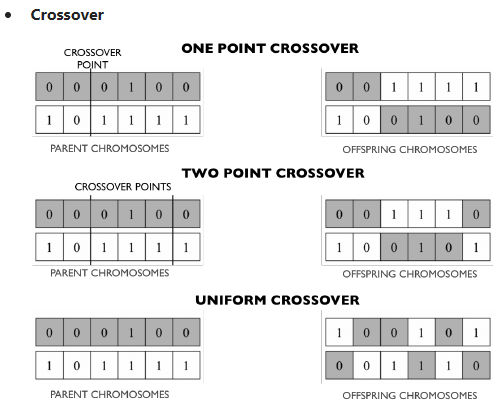

In [35]:
def cro_mut(mother, father,crossover, mutation,length):
      
    index=[0]
    index=index+random.sample(range(1,length),crossover)
    index=index+[length]
    child1=mother.copy()
    child2=father.copy()
    for i in range(crossover+1):
        if random.sample(range(2),1)[0]:
            index2=index[i]
            index3=index[i+1]
            child1[index2:index3]=father[index2:index3]
            child2[index2:index3]=mother[index2:index3]
    for i in range(length):
        temp=random.sample(range(mutation),1)[0]
        if temp==0:
            if child1[i]==0:
                child1[i]=1
            else:
                child1[i]=0
    for i in range(length):
        temp=random.sample(range(mutation),1)[0]
        if temp==0:
            if child2[i]==0:
                child1[i]=1
            else:
                child2[i]=0
          
    return [np.array(child1),np.array(child2)]

In [36]:
def GA (model, X_train,y_train,X_val,y_val, iteration=50, population=100, crossover=1, mutation=100):
      
    for i in range(iteration):
        ###첫 세대 구성
        if i==0:
            var = np.array(range(len(X_train.columns)))
            var_length = len(var)
            one  = np.ones((population,round(var_length/2)))
            zero = np.zeros((population,var_length-round(var_length/2)))
            old_population = []
            temp = np.hstack([one,zero])
            temp = temp[0]
            for ind in range(population):
                temp2 = temp.copy()
                random.shuffle(temp2)
                old_population.append(temp2)
        ###염색체별 모델 구성 및 평가
        score_candidate = []
        for ind in range(population):
            temp=old_population[ind]
            temp_var=var[temp==1]
            Temp_X_train = X_train.iloc[:,temp_var]
            Temp_X_val   = X_val.iloc[:,temp_var]
            model.fit(Temp_X_train,y_train)
            prediction = model.predict(Temp_X_val)
            score = Acc(prediction>0.5,y_val,pri=False)
            score_candidate.append((score,list(temp)))
            
        score_candidate.sort()
        
        next_population=[]
        ###best 염색체 2개 보존
        next_population.append(np.array(score_candidate[-1][1]))
        next_population.append(np.array(score_candidate[-2][1]))
      
        ###Deterministic approch
        parent_set = score_candidate[round(0.7*population):]
      
        ###다음 세대 구성
        while len(next_population)<population:
            m=random.randrange(0,len(parent_set))
            f=random.randrange(0,len(parent_set))
            mother=parent_set[m][1]
            father=parent_set[f][1]
            next_population=next_population+cro_mut(mother,father,crossover,mutation,var_length)
            
        old_population = next_population
        print(old_population[:2])
        print(len(old_population))

In [37]:
GA(LinearRegression(), X_train,y_train,X_val,y_val,iteration=2,population=10, crossover=1, mutation=100)

[array([1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.]), array([0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.])]
10
[array([0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.]), array([1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0.,

### Step 6. Stopping Criteria 만족시 GA 종료
- Stopping Criteria를 만족할 경우 반복을 종료하고, 베스트 변수 조합을 선정함
    - Iterarion: 특정 반복 횟수 이상이되면 반복 종료
    - Performance: 적합도 함수 값이 기준 값 이상을 만족하면 반복 종료

In [45]:
def GA (model, X_train,y_train,X_val,y_val, iteration=50, stop=3, population=100, crossover=1, mutation=100):
    
    best_score = 0.0
    stop_count = 0
    for i in range(iteration):
        ###첫 세대 구성
        if i==0:
            var = np.array(range(len(X_train.columns)))
            var_length = len(var)
            one  = np.ones((population,round(var_length/2)))
            zero = np.zeros((population,var_length-round(var_length/2)))
            old_population = []
            temp = np.hstack([one,zero])
            temp = temp[0]
            for ind in range(population):
                temp2 = temp.copy()
                random.shuffle(temp2)
                old_population.append(temp2)
        ###염색체별 모델 구성 및 평가
        score_candidate = []
        for ind in range(population):
            temp=old_population[ind]
            temp_var=var[temp==1]
            Temp_X_train = X_train.iloc[:,temp_var]
            Temp_X_val   = X_val.iloc[:,temp_var]
            model.fit(Temp_X_train,y_train)
            prediction = model.predict(Temp_X_val)
            score = Acc(prediction>0.5,y_val,pri=False)
            score_candidate.append((score,list(temp)))
            
        score_candidate.sort()
        print(i,"th Best Score:",score_candidate[-1][0])
        
        if best_score>=score_candidate[-1][0]:
            stop_count = stop_count+1
        else:
            stop_count = 0
        
        if stop_count==stop:
            break
        
        best_score = score_candidate[-1][0]
        next_population=[]
        ###best 염색체 2개 보존
        next_population.append(np.array(score_candidate[-1][1]))
        next_population.append(np.array(score_candidate[-2][1]))
      
        ###Deterministic approch
        parent_set = score_candidate[round(0.7*population):]
      
        ###다음 세대 구성
        while len(next_population)<population:
            m=random.randrange(0,len(parent_set))
            f=random.randrange(0,len(parent_set))
            mother=parent_set[m][1]
            father=parent_set[f][1]
            next_population=next_population+cro_mut(mother,father,crossover,mutation,var_length)
            
        old_population = next_population
        
    ###반복이 종료된 후 마지막 세대의 best 염색체 선정 및 모델 반환
    for ind in range(population):
        temp=old_population[ind]
        temp_var=var[temp==1]
        Temp_X_train = X_train.iloc[:,temp_var]
        Temp_X_val   = X_val.iloc[:,temp_var]
        model.fit(Temp_X_train,y_train)
        prediction = model.predict(Temp_X_val)
        score = Acc(prediction>0.5,y_val,pri=False)
        score_candidate.append((score,list(temp)))
        
    score_candidate.sort()
    best_chr=score_candidate[-1][1]
    best_var=var[np.array(best_chr)==1]
    best_X_train = X_train.iloc[:,best_var]
    best_X_val   = X_val.iloc[:,best_var]
    model.fit(best_X_train,y_train)
    prediction = model.predict(best_X_val)
    best_score = Acc(prediction>0.5,y_val,pri=False)
    print(score_candidate[-1][0]==best_score)
    
    return model, best_var, best_score 

In [49]:
best_model, best_var, best_score = GA(LinearRegression(), X_train,y_train,X_val,y_val,iteration=30, stop=5, population=200, crossover=2, mutation=100)

0 th Best Score: 0.9347408829174664
1 th Best Score: 0.9366602687140115
2 th Best Score: 0.9404990403071017
3 th Best Score: 0.9424184261036468
4 th Best Score: 0.944337811900192
5 th Best Score: 0.946257197696737
6 th Best Score: 0.946257197696737
7 th Best Score: 0.946257197696737
8 th Best Score: 0.946257197696737
9 th Best Score: 0.9481765834932822
10 th Best Score: 0.9481765834932822
11 th Best Score: 0.9481765834932822
12 th Best Score: 0.9481765834932822
13 th Best Score: 0.9481765834932822
14 th Best Score: 0.9481765834932822
True


In [50]:
pred_test = best_model.predict(X_test.iloc[:,best_var])
print("선형 회귀 GA")
linear_GA = Acc(pred_test>0.5,y_test)
print("선택된 변수 개수:", len(best_var))
print("Acc 증감:",round((linear_GA-linear_all)*100,1),"%")

선형 회귀 GA
Accuracy: 92.9 %
선택된 변수 개수: 37
Acc 증감: 0.4 %


In [51]:
best_model, best_var, best_score = GA(LogisticRegression(solver="lbfgs",max_iter=300), X_train,y_train,X_val,y_val,iteration=30,stop=5, population=200, crossover=2, mutation=100)

0 th Best Score: 0.9616122840690979
1 th Best Score: 0.9654510556621881
2 th Best Score: 0.9673704414587332
3 th Best Score: 0.9692898272552783
4 th Best Score: 0.9712092130518234
5 th Best Score: 0.9712092130518234
6 th Best Score: 0.9731285988483686
7 th Best Score: 0.9750479846449136
8 th Best Score: 0.9750479846449136
9 th Best Score: 0.9750479846449136
10 th Best Score: 0.9750479846449136
11 th Best Score: 0.9750479846449136
12 th Best Score: 0.9750479846449136
True


In [52]:
pred_test = best_model.predict(X_test.iloc[:,best_var])
print("로지스틱 회귀 GA")
logistic_GA = Acc(pred_test>0.5,y_test)
print("선택된 변수 개수:", len(best_var))
print("Acc 증감:",round((logistic_GA-logistic_all)*100,1),"%")

로지스틱 회귀 GA
Accuracy: 95.6 %
선택된 변수 개수: 39
Acc 증감: 0.4 %
